In [1]:
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
weiss_growth_timecourse = pd.read_csv("pairwise_time_course.csv").fillna(0)

In [3]:
weiss_growth_72_hrs = pd.read_excel("41396_2021_1153_MOESM2_ESM.xlsx",sheet_name="coculture abs abundance 72h")

In [4]:
xml_files = [fl for fl in os.listdir('OMM12_20210804_gapseq_full_models') if '.xml' in fl]
spc = [fl.replace(".xml","") for fl in xml_files]

In [5]:
strain_abbv = {}
for sp in spc:
    strain_abbv[sp] = sp.split("_")[-1]
strain_abbv['Akkermansia_muciniphilaYL44'] = "YL44"
strain_abbv['Acutalibacter_muris_KB1'] = "KB18"

In [12]:
growth_log_ratio = pd.DataFrame(index = spc,columns = spc)
ttest_pvalue = pd.DataFrame(index = spc,columns = spc)
ttest_stat = pd.DataFrame(index = spc,columns = spc)

for trg in spc:
    trgdf = weiss_growth_72_hrs[weiss_growth_72_hrs["probe"] == strain_abbv[trg]]
    mono = trgdf[["Mono" in co for co in trgdf['coculture']]]
    monocults = np.array([mono["exp1_copies/5ng gDNA (16Scorrected)"].iloc[0],mono["exp2_copies/5ng gDNA (16Scorrected)"].iloc[0],mono["exp3_copies/5ng gDNA (16Scorrected)"].iloc[0]])
    for src in spc:
        if src != trg:
            srcdf = trgdf[[strain_abbv[src] in co for co in trgdf['coculture']]]
            if len(srcdf):
                try:
                    cocults = np.array([srcdf["exp1_copies/5ng gDNA (16Scorrected)"].iloc[0],srcdf["exp2_copies/5ng gDNA (16Scorrected)"].iloc[0],srcdf["exp3_copies/5ng gDNA (16Scorrected)"].iloc[0]])
                    growth_log_ratio.loc[src,trg] = np.mean(np.log(cocults) - np.log(monocults))
                    ttest = st.ttest_ind(monocults,cocults)
                    ttest_pvalue.loc[src,trg] = ttest.pvalue
                    ttest_stat.loc[src,trg] = ttest.statistic
                except TypeError:
                    growth_log_ratio.loc[src,trg] = 0
                    ttest_pvalue.loc[src,trg] = 1
                    ttest_stat.loc[src,trg] = 0
            else:
                growth_log_ratio.loc[src,trg] = 0
                ttest_pvalue.loc[src,trg] = 1
                ttest_stat.loc[src,trg] = 0
        else:
            growth_log_ratio.loc[src,trg] = 0
            ttest_pvalue.loc[src,trg] = 1
            ttest_stat.loc[src,trg] = 0

In [13]:
growth_log_ratio

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
Clostridium_innocuum_I46,0,-1.201279,0,-1.398471,-2.606869,-7.050416,-0.781016,-3.625597,-3.364959,-1.596312,1.157542,-0.127029
Bacteroides_caecimuris_I48,-0.219868,0,-2.99432,-0.472275,-4.430086,-7.86185,-0.054879,0,-2.697598,-1.464635,-0.278822,-0.338877
Limosilactobacillus_reuteri_I49,-0.141953,0.054962,0,-0.828074,-1.021575,-5.942398,0.279071,-0.187422,-2.874766,-0.918044,-0.405551,-0.223043
Flavonifractor_plautii_YL31,-0.030101,-0.269414,-12.951567,0,-0.30673,-0.416935,-0.088095,-0.823146,0,-1.674099,0.503143,0
Muribaculum_intestinale_YL27,0.286174,-0.048757,-1.790152,-0.345883,0,-4.827837,0.461085,0,-1.930551,-0.537038,0.3164,-0.236389
Akkermansia_muciniphilaYL44,-0.268035,-0.484632,-0.631164,-0.492796,-0.014773,0,-0.206979,-1.002281,-2.266622,0,0.522449,-0.439929
Turicimonas_muris_YL45,0.177688,-0.043123,-0.351514,-0.143223,-1.643923,-0.333302,0,-8.42073,-2.270084,-1.69507,0.255321,-0.440955
Acutalibacter_muris_KB1,0.038295,0.115501,0.05297,0.122264,-0.170682,-0.078401,0.47397,0,-2.217183,0.095853,0.613004,-0.42855
Enterocloster_clostridioformis_YL32,0.010358,-0.289775,-0.789224,-1.891468,-2.098773,-7.139403,-0.358377,0,0,-1.511479,0.241829,-0.769062
Bifidobacterium_animalis_YL2,0.286174,-0.048757,-1.790152,-0.345883,-2.606869,-6.356738,0,0,-3.937458,0,0.143022,-0.236389


In [14]:
ttest_pvalue

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
Clostridium_innocuum_I46,1,0.099656,1,0.058792,0.007999,0.005805,0.020546,0.035344,0.372664,0.048892,0.03699,0.420031
Bacteroides_caecimuris_I48,0.707737,1,0.019883,0.964326,0.006142,0.005795,0.791336,1,0.373419,0.124208,0.896396,0.139556
Limosilactobacillus_reuteri_I49,0.799241,0.920734,1,0.181026,0.033855,0.005857,0.171353,0.958616,0.372971,0.288608,0.479871,0.272836
Flavonifractor_plautii_YL31,0.898591,0.419166,0.016248,1,0.329501,0.199503,0.545734,0.16259,1,0.497025,0.242299,1
Muribaculum_intestinale_YL27,0.173273,0.736469,0.044608,0.588493,1,0.006032,0.011039,1,0.374445,0.302682,0.516596,0.21643
Akkermansia_muciniphilaYL44,0.679567,0.366975,0.140126,0.692386,0.861246,1,0.199503,0.129778,0.373813,1,0.122221,0.086531
Turicimonas_muris_YL45,0.258668,0.728136,0.275282,0.811832,0.013063,0.548991,1,0.030195,0.373789,0.064546,0.547115,0.16273
Acutalibacter_muris_KB1,0.807662,0.900346,0.952528,0.850118,0.739952,0.607326,0.019385,1,0.373946,0.94506,0.098421,0.120491
Enterocloster_clostridioformis_YL32,0.852303,0.377302,0.097834,0.033828,0.009051,0.005827,0.130168,1,1,0.108732,0.558463,0.021296
Bifidobacterium_animalis_YL2,0.173273,0.736469,0.044608,0.588493,0.007999,0.005854,1,1,0.372473,1,0.785195,0.21643


In [463]:
(ttest_pvalue < 0.05).sum().sum()

34

In [15]:
ttest_stat

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
Clostridium_innocuum_I46,0,2.134916,0,2.620116,4.90788,5.370571,3.716032,3.125328,1.002885,2.798385,-3.078368,0.897833
Bacteroides_caecimuris_I48,0.402737,0,3.75371,0.047588,5.28669,5.37305,0.282836,0,1.001124,1.941186,0.138692,1.840262
Limosilactobacillus_reuteri_I49,0.271781,-0.105935,0,1.617747,3.170079,5.35718,-1.664456,-0.055213,1.002168,1.222547,0.778282,1.270308
Flavonifractor_plautii_YL31,0.135731,0.899661,3.991256,0,1.109294,1.535313,0.659287,1.709214,0,0.746179,-1.370879,0
Muribaculum_intestinale_YL27,-1.654971,0.36084,2.88899,0.5874,0,5.313399,-4.474203,0,0.998734,1.181973,-0.710553,1.466383
Akkermansia_muciniphilaYL44,0.444658,1.016264,1.836749,0.425471,-0.186341,0,1.535313,1.903073,1.000205,0,-1.955235,2.26156
Turicimonas_muris_YL45,-1.31553,0.372908,1.262731,-0.254258,4.259074,0.653679,0,3.290707,1.000261,2.531729,-0.656907,1.70848
Acutalibacter_muris_KB1,-0.26005,-0.133364,-0.063349,-0.201529,0.355814,0.556832,-3.783042,0,0.999894,-0.073336,-2.146014,1.967669
Enterocloster_clostridioformis_YL32,-0.198544,0.992109,2.151345,3.170928,4.737907,5.364974,1.900469,0,0,2.057731,-0.637498,3.675077
Bifidobacterium_animalis_YL2,-1.654971,0.36084,2.88899,0.5874,4.90788,5.35809,0,0,1.003332,0,-0.291452,1.466383


In [19]:
strain_abbv_r = {v: k for k, v in strain_abbv.items()}

In [167]:
sep_exps = {}
for grth_exp in np.unique(weiss_growth_timecourse["coculture"]):
    df = weiss_growth_timecourse[weiss_growth_timecourse["coculture"] == grth_exp]
    if "Mono" in grth_exp:
        fld = "{}_results".format(strain_abbv_r[df['probe1'].iloc[0]])
    else:
        if "{}_{}_results".format(strain_abbv_r[df['probe1'].iloc[0]],strain_abbv_r[df['probe2'].iloc[0]]) in os.listdir('weiss_results'):
            fld = "{}_{}_results".format(strain_abbv_r[df['probe1'].iloc[0]],strain_abbv_r[df['probe2'].iloc[0]])
        elif "{}_{}_results".format(strain_abbv_r[df['probe2'].iloc[0]],strain_abbv_r[df['probe1'].iloc[0]]) in os.listdir('weiss_results'):
            fld = "{}_{}_results".format(strain_abbv_r[df['probe2'].iloc[0]],strain_abbv_r[df['probe1'].iloc[0]]) 
        else:
            fld = "Missing"
    if fld != "Missing":
        mics = pd.read_csv(os.path.join("weiss_results",fld,"Microbes.tsv"),sep = '\t',index_col = 0) 
        mets = pd.read_csv(os.path.join("weiss_results",fld,"Metabolites.tsv"),sep = '\t',index_col = 0) 
        av_net = pd.read_csv(os.path.join('weiss_results',fld,'SpeciesNetworks','Average','SpeciesNetworkEdgesAverage.tsv'),sep = '\t',index_col = 0)
        all_nets = pd.read_csv(os.path.join('weiss_results',fld,'SpeciesNetworks','Combined','SpeciesNetworkEdgesCombined.tsv'),sep = '\t',index_col = 0)
    df.index = df["time [h]"]
    dic = {"Experiment_DF":df,"Folder":fld,"SimulatedMicrobes":mics,"SimulatedMetabolites":mets,"AverageMetConSIN_sp":av_net,"AllMetConSIN_sp":all_nets}
    sep_exps[grth_exp] = dic

In [124]:
any([di["Folder"] == "Missing" for di in sep_exps.values()])

False

In [125]:
sep_exps.keys()

dict_keys(['I46 Mono', 'I46I48', 'I46I49', 'I46YL58', 'I48 Mono', 'I48I49', 'I48YL58', 'I49YL58', 'KB1 Mono', 'KB18 Mono', 'KB18I46', 'KB18I48', 'KB18I49', 'KB18YL27', 'KB18YL31', 'KB18YL32', 'KB18YL44', 'KB18YL45', 'KB18YL58', 'KB1I46', 'KB1I48', 'KB1I49', 'KB1KB18', 'KB1YL2', 'KB1YL27', 'KB1YL31', 'KB1YL32', 'KB1YL44', 'KB1YL45', 'KB1YL58', 'YL2 Mono', 'YL27 Mono', 'YL27I46', 'YL27I48', 'YL27I49', 'YL27YL31', 'YL27YL32', 'YL27YL44', 'YL27YL45', 'YL27YL58', 'YL2I46', 'YL2I48', 'YL2I49', 'YL2KB18', 'YL2YL27', 'YL2YL31', 'YL2YL32', 'YL2YL44', 'YL2YL45', 'YL2YL58', 'YL31 Mono', 'YL31I46', 'YL31I48', 'YL31I49', 'YL31YL32', 'YL31YL44', 'YL31YL45', 'YL31YL58', 'YL32 Mono', 'YL32I46', 'YL32I48', 'YL32I49', 'YL32YL44', 'YL32YL45', 'YL32YL58', 'YL44 Mono', 'YL44I46', 'YL44I48', 'YL44I49', 'YL44YL45', 'YL44YL58', 'YL45 Mono', 'YL45I46', 'YL45I48', 'YL45I49', 'YL45YL58', 'YL58 Mono'])

In [430]:
def make_com_fig(di,co = None):

    fig,ax = plt.subplots(figsize = (7,5))
    relsim = di["SimulatedMicrobes"]/di["SimulatedMicrobes"].sum()
    if co == None:
        co = ["b","y"]
    color_dict = dict([(relsim.index[i],co[i]) for i in range(2)])
    for t in relsim.index:
        ax.plot(relsim.columns.astype(float)/20,relsim.loc[t],label = t.replace("_"," "),color = color_dict[t])
    ax.plot(di["Experiment_DF"]["time [h]"]/72,di["Experiment_DF"]["relativ abundance probe1"],'x',color=color_dict[strain_abbv_r[di["Experiment_DF"]["probe1"].iloc[0]]])
    ax.plot(di["Experiment_DF"]["time [h]"]/72,di["Experiment_DF"]["relative abundance probe 2"],'x',color=color_dict[strain_abbv_r[di["Experiment_DF"]["probe2"].iloc[0]]])

    ax.legend()

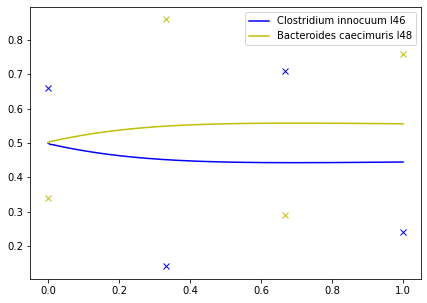

In [431]:
make_com_fig(sep_exps["I46I48"])

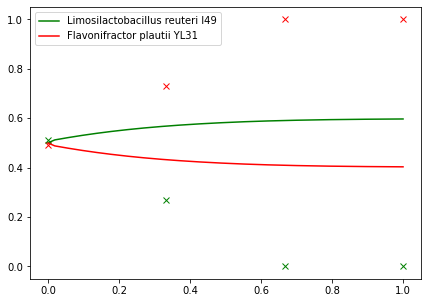

In [437]:
make_com_fig(sep_exps["YL31I49"],co = ['g','r'])

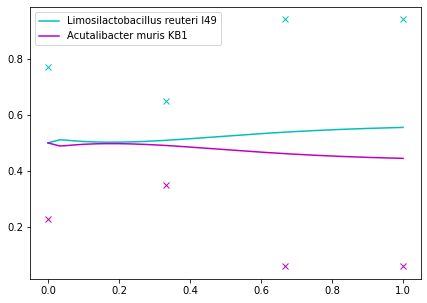

In [438]:
make_com_fig(sep_exps["KB18I49"],co = ['c','m'])

In [414]:
times = [24,48,72]
sim_ordering = dict([(ti,pd.DataFrame(index = spc,columns = spc).fillna(False)) for ti in times])
sim_error = dict([(ti,pd.DataFrame(index = spc,columns = spc).fillna(0)) for ti in times])
T = 0
for exper,edict in sep_exps.items():
    if "Mono" not in exper:
        relsim = edict["SimulatedMicrobes"]/edict["SimulatedMicrobes"].sum()
        pair = relsim.index
        for ti in times:
            simcol = relsim.columns[np.argmin(np.abs(np.array(relsim.columns.astype(float)/relsim.columns.astype(float)[-1])-ti/72))]
            grthend1 = edict["Experiment_DF"].loc[ti,"relativ abundance probe1"]
            grthend2 = 1-grthend1
            p1_m = strain_abbv_r[edict["Experiment_DF"]["probe1"].iloc[0]]
            simend1 = relsim.loc[p1_m,simcol]
            simend2 = 1-simend1
            if p1_m == pair[0]:
                p2_m = pair[1]
            else:
                p2_m = pair[0]

            sim_ordering[ti].loc[pair[0],pair[1]] = ((grthend1>0.5 and simend1>0.5) or (grthend1<0.5 and simend1<0.5))

            sim_error[ti].loc[p1_m,p2_m] = np.abs(grthend1-simend1)
            sim_ordering[ti].loc[pair[1],pair[0]] = sim_ordering[ti].loc[pair[0],pair[1]]
            sim_error[ti].loc[p2_m,p1_m] = np.abs(grthend2-simend2)

In [415]:
all_ordering = pd.DataFrame(index = times,columns =  spc)
for ky in times:
    all_ordering.loc[ky]=sim_ordering[ky].sum()/11
all_ordering

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
24,0.636364,0.636364,0.454545,0.454545,0.454545,0.363636,0.454545,0.818182,0.090909,0.272727,0.181818,0.818182
48,0.454545,0.636364,0.454545,0.454545,0.545455,0.454545,0.454545,0.909091,0.181818,0.454545,0.181818,0.818182
72,0.636364,0.636364,0.545455,0.454545,0.545455,0.454545,0.545455,0.909091,0.272727,0.363636,0.090909,0.727273


In [481]:
all_ordering_piv = pd.DataFrame(columns = ["Proportion Correct","Microbe","Time (hrs)"])
all_ordering_piv["Proportion Correct"] = all_ordering.values.flatten()
all_ordering_piv["Microbe"] = [strain_abbv[c] for c in all_ordering.columns]*3
all_ordering_piv["Time (hrs)"] = [24]*len(all_ordering.columns) + [48]*len(all_ordering.columns) + [72]*len(all_ordering.columns)


In [482]:
all_ordering_piv

,Proportion Correct,Microbe,Time (hrs)
0,0.636364,I46,24
1,0.636364,I48,24
2,0.454545,I49,24
3,0.454545,YL31,24
4,0.454545,YL27,24
5,0.363636,YL44,24
6,0.454545,YL45,24
7,0.818182,KB18,24
8,0.090909,YL32,24
9,0.272727,YL2,24


Text(0.5, 1.0, 'Proportion of Pair Growth Predictions With Correct Higher-Abundance Organism')

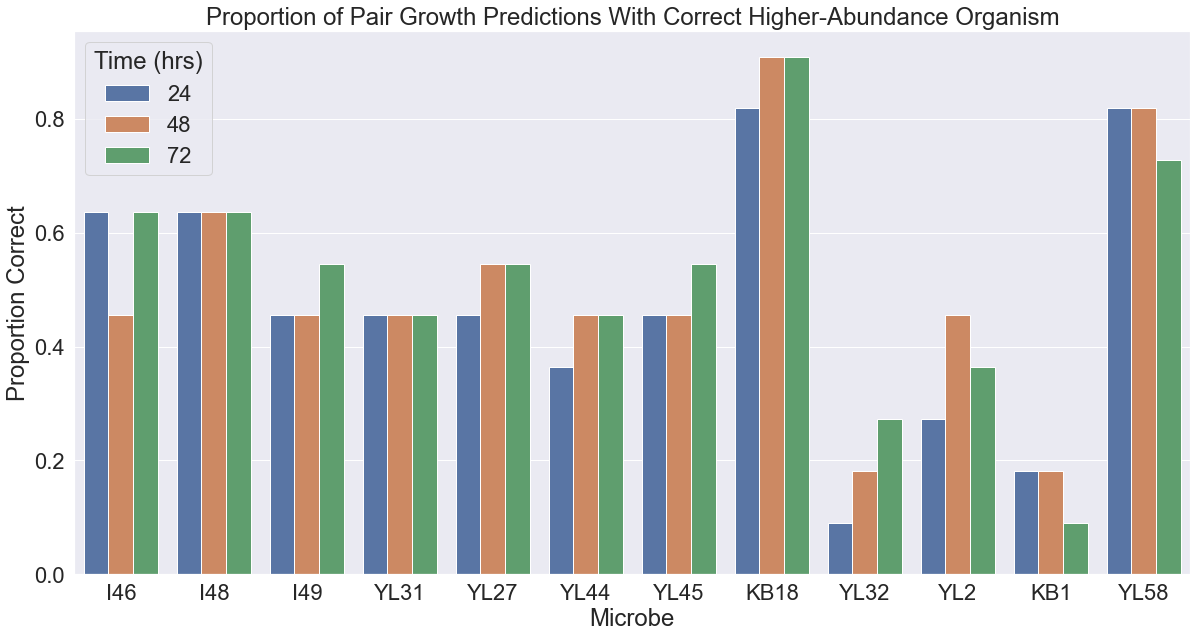

In [488]:
fig,ax = plt.subplots(figsize = (20,10))
sb.set(font_scale=2)
sb.barplot(data = all_ordering_piv,x = "Microbe",y ="Proportion Correct",hue = "Time (hrs)")
ax.set_title("Proportion of Pair Growth Predictions With Correct Higher-Abundance Organism")

In [423]:
avg_error = pd.DataFrame(index = times,columns =  spc)
for ky in times:
    avg_error.loc[ky]=sim_error[ky].mean()
avg_error

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
24,0.289327,0.318343,0.308532,0.258682,0.203695,0.299929,0.255921,0.295121,0.430699,0.273102,0.297332,0.196487
48,0.363951,0.323064,0.389084,0.306758,0.28556,0.381606,0.284047,0.359428,0.403154,0.281835,0.417685,0.208857
72,0.399425,0.308946,0.38685,0.295313,0.298176,0.385875,0.277646,0.375312,0.387797,0.353677,0.387643,0.275463


In [424]:
avg_error.to_latex("average_error.tex")

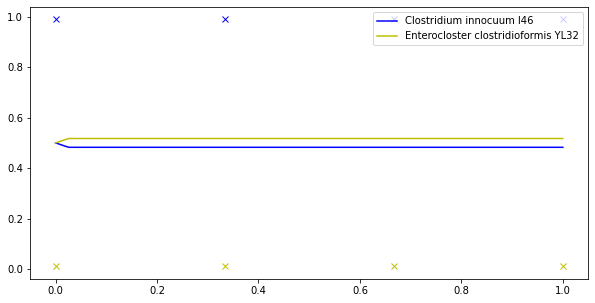

In [352]:
make_com_fig(sep_exps["YL32I46"])

In [285]:
def get_avg_in(metser,t1,t2):
    t1_col = np.argmin(np.abs(np.array(metser.index.astype(float)-t1)))
    t2_col = np.argmin(np.abs(np.array(metser.index.astype(float)-t2)))
    return metser.iloc[t1_col:t2_col+1].mean()

In [303]:
def get_path_df(di1):
    ti_ints = [fld for fld in os.listdir(os.path.join('weiss_results',di1['Folder'],'SpcMetNetworks')) if fld not in ["Combined","Average","Difference"]]
    all_inters = pd.DataFrame(columns=["Source","Target","Edge","Path","Metabolite","Weight","StartTime","EndTime","Length","MetaboliteBiomass","EffectiveWeight"])
    for mic in di1['SimulatedMicrobes'].index:
        for ky in ti_ints:
            net1 = pd.read_csv(os.path.join('weiss_results',di1["Folder"],'SpcMetNetworks',ky,"SpcMetNetworksEdgesSummary{}.tsv".format(ky)),sep = '\t',index_col = 0)
            mic1_s1 = net1[net1["Source"] == mic]
            mic1_s2 = net1[[s in mic1_s1["Target"].values for s in net1["Source"]]]
            stti = float(ky.split("-")[0])
            endti = float(ky.split("-")[1])
            for rw in mic1_s2.index:
                s1rw = mic1_s1[mic1_s1["Target"] == mic1_s2.loc[rw,"Source"]]
                sr = s1rw["Source"].iloc[0]
                trg = mic1_s2.loc[rw,"Target"]
                edge = "{}->{}".format(sr,trg)
                met = s1rw["Target"].iloc[0]
                path = "{}->{}->{}".format(sr,met,trg)
                wei = mic1_s2.loc[rw,"Weight"]*s1rw["Weight"].iloc[0]
                met_bm = get_avg_in(di1["SimulatedMetabolites"].loc[met],stti,endti)
                all_inters.loc["#".join([edge,ky])] = [sr,trg,edge,path,met,wei,stti,endti,endti-stti,met_bm,wei*met_bm]
    all_inters  = all_inters[all_inters["Length"] >0]
    pth_summs = pd.DataFrame(columns = ["Source","Target","Metabolite","Edge","AvgEffectiveWeight","TotalTime"])
    for pth in np.unique(all_inters["Path"]):
        pathdf = all_inters[all_inters["Path"] == pth]
        sr = pathdf["Source"].iloc[0]
        tg = pathdf["Target"].iloc[0]
        met = pathdf["Metabolite"].iloc[0]
        tottime = pathdf["Length"].sum()
        avgew = (pathdf["Length"]*pathdf["EffectiveWeight"]).sum()
        pth_summs.loc[pth] = [sr,tg,met,"{}->{}".format(sr,tg),avgew,tottime]
    return pth_summs

In [304]:
get_path_df(sep_exps["YL31I49"])

,Source,Target,Metabolite,Edge,AvgEffectiveWeight,TotalTime
Flavonifractor_plautii_YL31->5'-Deoxyadenosine-e0->Flavonifractor_plautii_YL31,Flavonifractor_plautii_YL31,Flavonifractor_plautii_YL31,5'-Deoxyadenosine-e0,Flavonifractor_plautii_YL31->Flavonifractor_pl...,-0.012058,9.5334
Flavonifractor_plautii_YL31->Folate-e0->Flavonifractor_plautii_YL31,Flavonifractor_plautii_YL31,Flavonifractor_plautii_YL31,Folate-e0,Flavonifractor_plautii_YL31->Flavonifractor_pl...,-0.090740,10.4442
Flavonifractor_plautii_YL31->L-Aspartate-e0->Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Limosilactobacillus_reuteri_I49,L-Aspartate-e0,Flavonifractor_plautii_YL31->Limosilactobacill...,-0.428920,0.0081
Flavonifractor_plautii_YL31->O2-e0->Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Limosilactobacillus_reuteri_I49,O2-e0,Flavonifractor_plautii_YL31->Limosilactobacill...,0.000845,0.0036
Flavonifractor_plautii_YL31->PAN->Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Limosilactobacillus_reuteri_I49,PAN,Flavonifractor_plautii_YL31->Limosilactobacill...,-0.001913,0.0080
Flavonifractor_plautii_YL31->Riboflavin->Flavonifractor_plautii_YL31,Flavonifractor_plautii_YL31,Flavonifractor_plautii_YL31,Riboflavin,Flavonifractor_plautii_YL31->Flavonifractor_pl...,-0.000580,0.0081
Flavonifractor_plautii_YL31->Riboflavin->Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Limosilactobacillus_reuteri_I49,Riboflavin,Flavonifractor_plautii_YL31->Limosilactobacill...,-0.224453,19.9660
Limosilactobacillus_reuteri_I49->5'-Deoxyadenosine-e0->Flavonifractor_plautii_YL31,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,5'-Deoxyadenosine-e0,Limosilactobacillus_reuteri_I49->Flavonifracto...,0.026562,9.5334
Limosilactobacillus_reuteri_I49->Folate-e0->Flavonifractor_plautii_YL31,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Folate-e0,Limosilactobacillus_reuteri_I49->Flavonifracto...,-0.090740,10.4442
Limosilactobacillus_reuteri_I49->L-Aspartate-e0->Limosilactobacillus_reuteri_I49,Limosilactobacillus_reuteri_I49,Limosilactobacillus_reuteri_I49,L-Aspartate-e0,Limosilactobacillus_reuteri_I49->Limosilactoba...,-0.007541,0.0081


In [298]:
full_comm_di = {"Folder":"full_community",
                "SimulatedMicrobes":pd.read_csv(os.path.join('weiss_results','full_community','Microbes.tsv'),sep = '\t',index_col = 0),
                "SimulatedMetabolites":pd.read_csv(os.path.join('weiss_results','full_community','Metabolites.tsv'),sep = '\t',index_col = 0)}

In [309]:
full_comm_pathdf = get_path_df(full_comm_di)

In [443]:
full_comm_pathdf

,Source,Target,Metabolite,Edge,AvgEffectiveWeight,TotalTime
Acutalibacter_muris_KB1->CELB-e0->Enterococcus_faecalis_KB1,Acutalibacter_muris_KB1,Enterococcus_faecalis_KB1,CELB-e0,Acutalibacter_muris_KB1->Enterococcus_faecalis...,-0.177550,19.9747
Acutalibacter_muris_KB1->PAN->Bacteroides_caecimuris_I48,Acutalibacter_muris_KB1,Bacteroides_caecimuris_I48,PAN,Acutalibacter_muris_KB1->Bacteroides_caecimuri...,-0.774991,19.9984
Acutalibacter_muris_KB1->PAN->Blautia_coccoides_YL58,Acutalibacter_muris_KB1,Blautia_coccoides_YL58,PAN,Acutalibacter_muris_KB1->Blautia_coccoides_YL58,-0.592128,19.9984
Acutalibacter_muris_KB1->PAN->Clostridium_innocuum_I46,Acutalibacter_muris_KB1,Clostridium_innocuum_I46,PAN,Acutalibacter_muris_KB1->Clostridium_innocuum_I46,-0.774991,19.9984
Acutalibacter_muris_KB1->PAN->Enterocloster_clostridioformis_YL32,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,PAN,Acutalibacter_muris_KB1->Enterocloster_clostri...,-0.774991,19.9984
...,...,...,...,...,...,...
Turicimonas_muris_YL45->Pyridoxal->Acutalibacter_muris_KB1,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Pyridoxal,Turicimonas_muris_YL45->Acutalibacter_muris_KB1,-0.276168,19.9984
Turicimonas_muris_YL45->Riboflavin->Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Akkermansia_muciniphilaYL44,Riboflavin,Turicimonas_muris_YL45->Akkermansia_muciniphil...,-0.154795,19.9984
Turicimonas_muris_YL45->Riboflavin->Bifidobacterium_animalis_YL2,Turicimonas_muris_YL45,Bifidobacterium_animalis_YL2,Riboflavin,Turicimonas_muris_YL45->Bifidobacterium_animal...,-0.118270,19.9984
Turicimonas_muris_YL45->Riboflavin->Flavonifractor_plautii_YL31,Turicimonas_muris_YL45,Flavonifractor_plautii_YL31,Riboflavin,Turicimonas_muris_YL45->Flavonifractor_plautii...,-0.154795,19.9984


<AxesSubplot:>

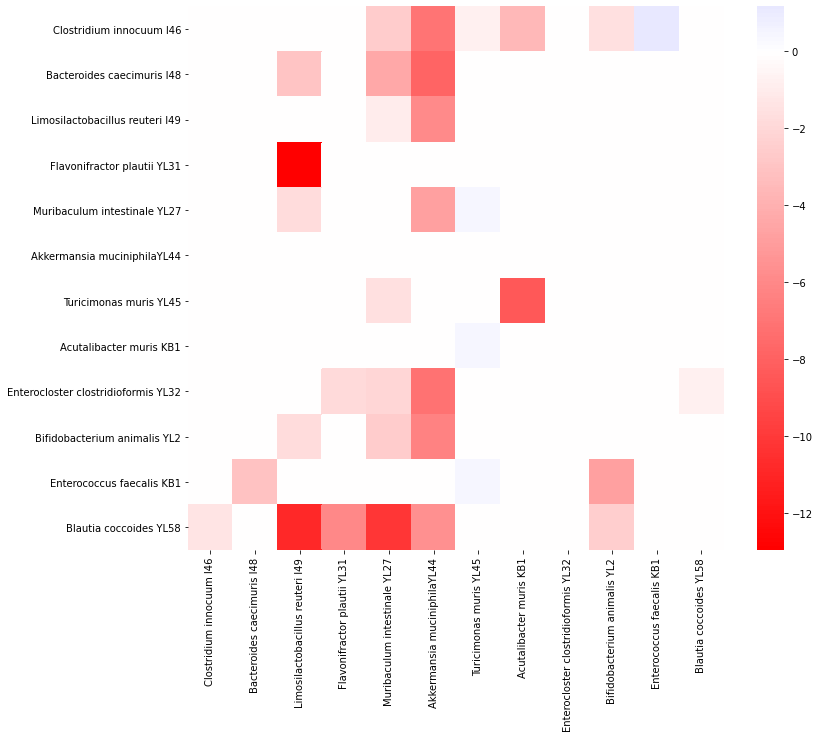

In [441]:
fig,ax = plt.subplots(figsize=(12,10))
pretty_sigdif = (ttest_pvalue < 0.05)*growth_log_ratio.fillna(0)
pretty_sigdif.index = [st.replace("_"," ") for st in pretty_sigdif.index]
pretty_sigdif.columns = [st.replace("_"," ") for st in pretty_sigdif.columns]
sb.heatmap(pretty_sigdif.fillna(0),center = 0,cmap = "bwr_r",ax = ax)

In [458]:
total_interaction = pd.DataFrame(index = spc,columns = spc).fillna(0)
total_interaction_weightsonly = pd.DataFrame(index = spc,columns = spc).fillna(0)

candidate_metabolites = pd.DataFrame(index = spc,columns = spc).fillna("")
strongest_matching_metabolite = pd.DataFrame(index=spc,columns=spc).fillna("")
for src in spc:
    for trg in spc:
        if "{}{}".format(strain_abbv[src],strain_abbv[trg]) in sep_exps.keys():
            ky = "{}{}".format(strain_abbv[src],strain_abbv[trg])
        elif "{}{}".format(strain_abbv[trg],strain_abbv[src]) in sep_exps.keys():
            ky = "{}{}".format(strain_abbv[trg],strain_abbv[src])
        else:
            ky = ""
        if ky != "":
            path_summ = get_path_df(sep_exps[ky])
            we = path_summ[path_summ["Source"] == src]["AvgEffectiveWeight"].sum()
            total_interaction.loc[src,trg] = we
            matching_rows = [rw for rw in path_summ[path_summ["Source"] == src].index if np.sign(path_summ.loc[rw,"AvgEffectiveWeight"])==np.sign((ttest_pvalue < 0.05)*growth_log_ratio).loc[src,trg]]
            candidate_metabolites.loc[src,trg] = "+".join(path_summ.loc[matching_rows,"Metabolite"])
            if len(matching_rows):
                mxind = matching_rows[path_summ.loc[matching_rows,"AvgEffectiveWeight"].abs().argmax()]
                strongest_matching_metabolite.loc[src,trg] = path_summ.loc[mxind,"Metabolite"].replace("-e0","")

In [331]:
total_interaction

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
Clostridium_innocuum_I46,0.000000,-0.453596,-4.811172,-2.896813,-1.185337,-0.536694,-0.599746,-1.282741,-1.633069,-0.427654,-1.602364,-1.225839
Bacteroides_caecimuris_I48,14.146436,0.000000,-1.679758,-0.610813,-1.448728,-0.886762,-1.597648,-0.981528,-1.080765,-1.486644,-0.043524,-1.430414
Limosilactobacillus_reuteri_I49,-1.574697,-1.680567,0.000000,-0.453761,-2.429924,-0.546164,-0.668706,-0.817162,-2.972017,-1.107007,-0.697346,-2.520959
Flavonifractor_plautii_YL31,12.827861,-0.574267,-0.757821,0.000000,-0.863372,-0.586735,-0.611935,-0.993493,-1.702593,-0.527397,-0.514718,-0.423376
Muribaculum_intestinale_YL27,-1.328377,-1.448728,-5.317897,-0.240146,0.000000,-1.488235,-0.584211,-1.194906,-1.620580,-0.532617,-0.554924,-1.736273
Akkermansia_muciniphilaYL44,-1.261709,-0.531292,-1.211118,-0.586735,-1.488235,0.000000,-0.408817,-0.998966,-1.731777,-0.552924,-0.523532,-1.339689
Turicimonas_muris_YL45,-0.615970,-1.597648,-0.521099,-0.611935,-0.570702,-0.560167,0.000000,-0.751880,-29.733292,-0.535691,-0.537117,-1.414071
Acutalibacter_muris_KB1,-2.768692,1.729886,-2.045402,1.795198,-2.566470,1.798115,-0.267373,0.000000,-2.770296,1.377611,-0.758490,-2.437467
Enterocloster_clostridioformis_YL32,-1.677988,-1.361491,-3.128829,-1.317482,-1.273482,-1.342123,-0.354771,-1.283486,0.000000,-1.322551,-1.342541,-1.117341
Bifidobacterium_animalis_YL2,-0.567799,-1.486644,-11.074874,-0.527397,-30.962506,-0.552924,-0.535691,-0.824073,-1.620945,0.000000,-0.416682,-1.341954


<AxesSubplot:>

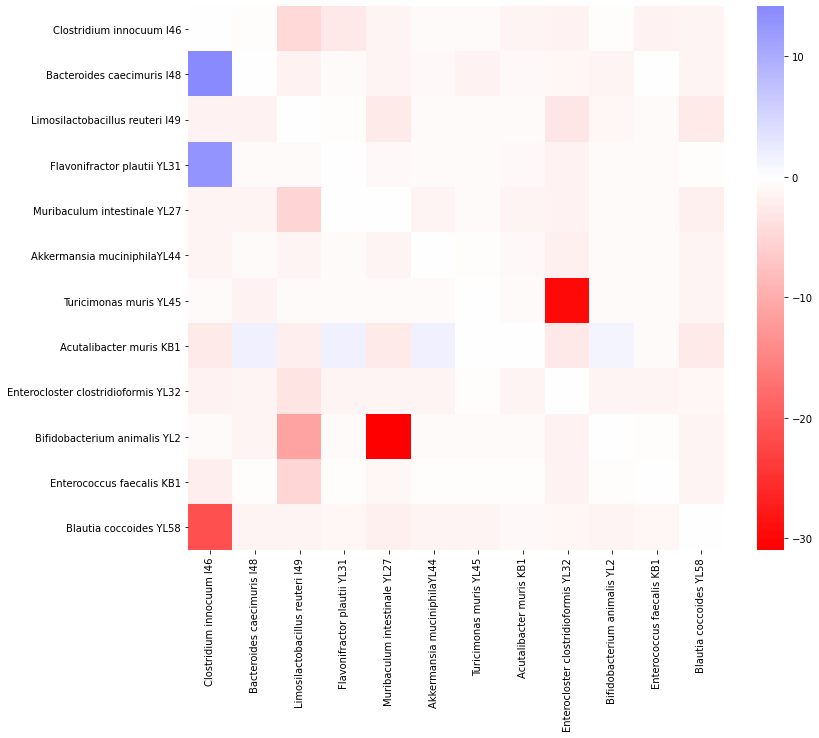

In [440]:
fig,ax = plt.subplots(figsize=(12,10))
pretty_ti = total_interaction.copy()
pretty_ti.index = [st.replace("_"," ") for st in pretty_ti.index]
pretty_ti.columns = [st.replace("_"," ") for st in pretty_ti.columns]

sb.heatmap(pretty_ti.fillna(0),center = 0,cmap = "bwr_r",ax = ax)

In [332]:
candidate_metabolites

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
Clostridium_innocuum_I46,,,,,D-Glucose-e0+D-Ribose-e0+L-Aspartate-e0+N-Acet...,L-Aspartate-e0+N-Acetyl-D-glucosamine-e0+PAN+R...,L-Aspartate-e0+PAN+Riboflavin+Riboflavin,PAN+PAN,,Folate-e0+L-Aspartate-e0+N-Acetyl-D-glucosamin...,,
Bacteroides_caecimuris_I48,,,O2-e0+PAN+PAN+Riboflavin,,PAN+PAN,PAN+Riboflavin+Spermidine-e0,,,,,,
Limosilactobacillus_reuteri_I49,,,,,L-Aspartate-e0+PAN+PAN+Riboflavin+Thiamine,L-Aspartate-e0+Melitose-e0+PAN+Riboflavin+Ribo...,,,,,,
Flavonifractor_plautii_YL31,,,5'-Deoxyadenosine-e0+Folate-e0+L-Aspartate-e0+...,,,,,,,,,
Muribaculum_intestinale_YL27,,,L-Aspartate-e0+PAN+PAN+Riboflavin,,,PAN+Riboflavin,O2-e0,,,,,
Akkermansia_muciniphilaYL44,,,,,,,,,,,,
Turicimonas_muris_YL45,,,,,PAN+Riboflavin+Riboflavin,,,Pyridoxal+Pyridoxal+Riboflavin,,,,
Acutalibacter_muris_KB1,,,,,,,Riboflavin,,,,,
Enterocloster_clostridioformis_YL32,,,,PAN+PAN,PAN+PAN,PAN+PAN,,,,,,N-acetyl-D-gluosamine+PAN+PAN
Bifidobacterium_animalis_YL2,,,L-Asparagine-e0+PAN+Riboflavin+Riboflavin+Urac...,,D-Glucose-e0+PAN+Riboflavin+Riboflavin,Riboflavin+Riboflavin,,,,,,


In [459]:
strongest_matching_metabolite
pretty_str_m = strongest_matching_metabolite.copy()
pretty_str_m.index = [st.replace("_"," ") for st in pretty_str_m.index]
pretty_str_m.columns = [st.replace("_"," ") for st in pretty_str_m.columns]

In [460]:
pretty_str_m

,Clostridium innocuum I46,Bacteroides caecimuris I48,Limosilactobacillus reuteri I49,Flavonifractor plautii YL31,Muribaculum intestinale YL27,Akkermansia muciniphilaYL44,Turicimonas muris YL45,Acutalibacter muris KB1,Enterocloster clostridioformis YL32,Bifidobacterium animalis YL2,Enterococcus faecalis KB1,Blautia coccoides YL58
Clostridium innocuum I46,,,,,N-Acetyl-D-glucosamine,Riboflavin,Riboflavin,PAN,,Riboflavin,,
Bacteroides caecimuris I48,,,PAN,,PAN,Riboflavin,,,,,,
Limosilactobacillus reuteri I49,,,,,PAN,Riboflavin,,,,,,
Flavonifractor plautii YL31,,,L-Aspartate,,,,,,,,,
Muribaculum intestinale YL27,,,L-Aspartate,,,PAN,O2,,,,,
Akkermansia muciniphilaYL44,,,,,,,,,,,,
Turicimonas muris YL45,,,,,Riboflavin,,,Pyridoxal,,,,
Acutalibacter muris KB1,,,,,,,Riboflavin,,,,,
Enterocloster clostridioformis YL32,,,,PAN,PAN,PAN,,,,,,N-acetyl-D-gluosamine
Bifidobacterium animalis YL2,,,Uracil,,D-Glucose,Riboflavin,,,,,,


<AxesSubplot:>

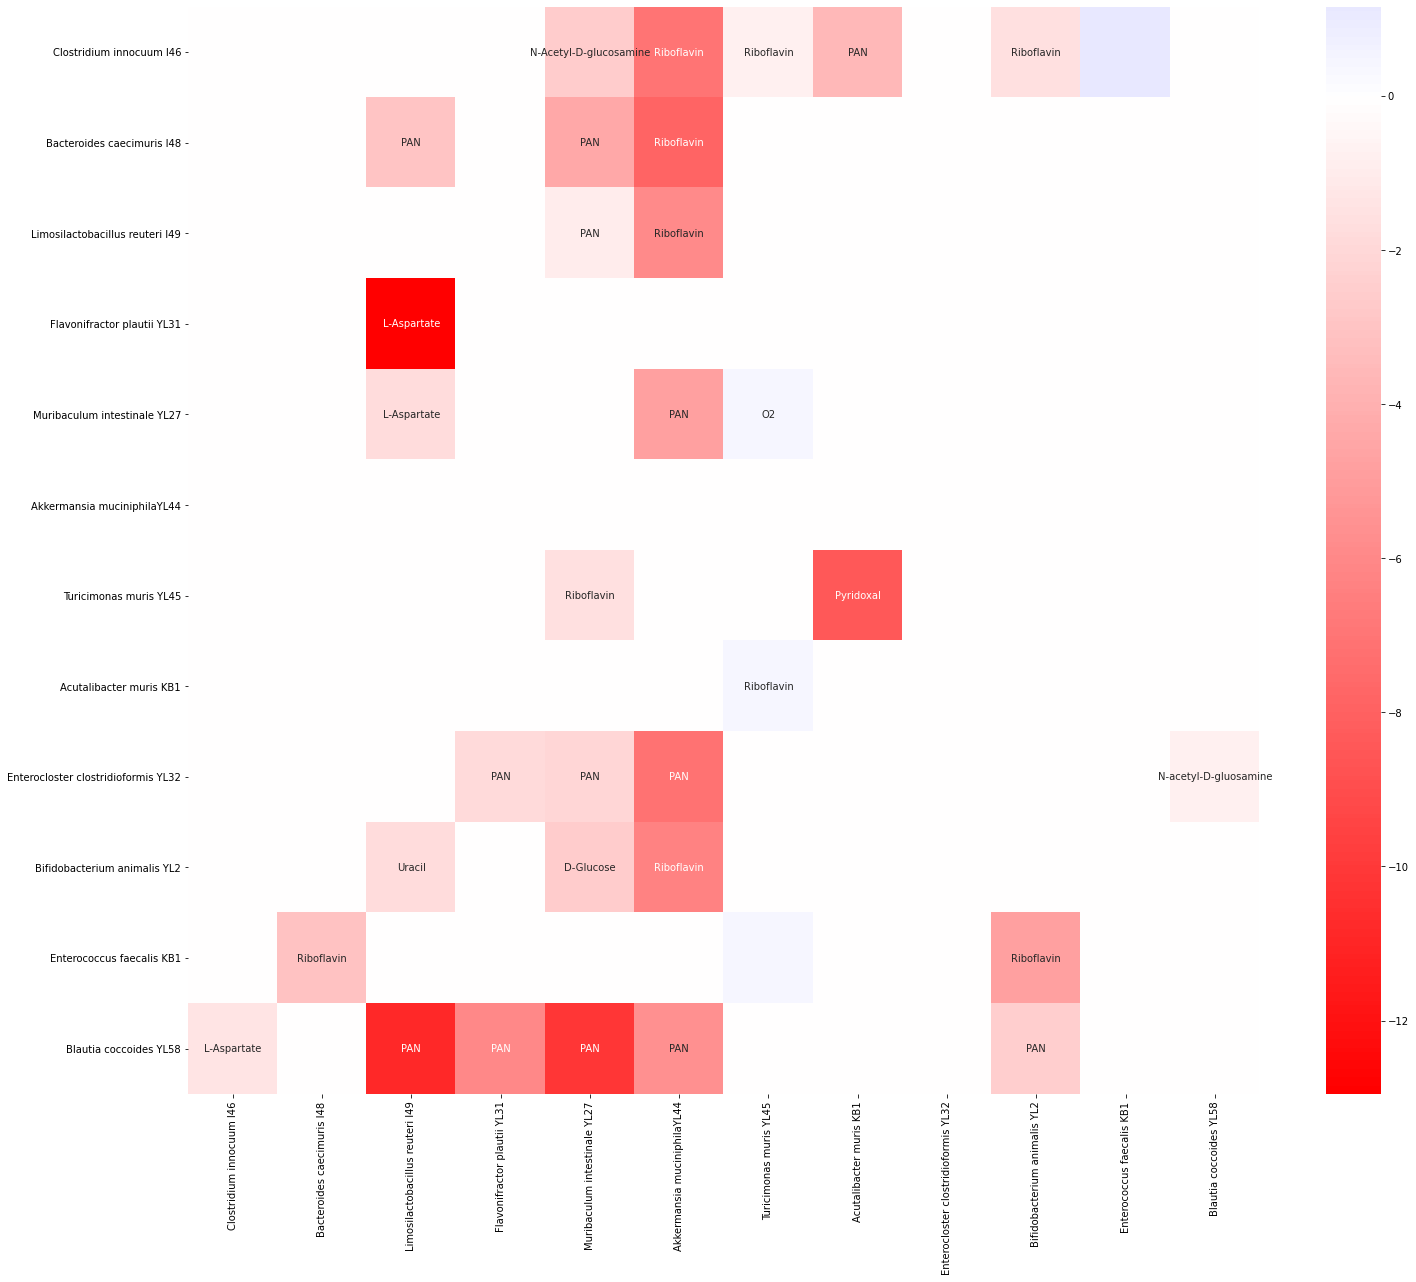

In [461]:
fig,ax = plt.subplots(figsize=(24,20))
pretty_sigdif = (ttest_pvalue < 0.05)*growth_log_ratio.fillna(0)
pretty_sigdif.index = [st.replace("_"," ") for st in pretty_sigdif.index]
pretty_sigdif.columns = [st.replace("_"," ") for st in pretty_sigdif.columns]
sb.heatmap(pretty_sigdif.fillna(0),center = 0,cmap = "bwr_r",ax = ax,annot = pretty_str_m.fillna(""),fmt = '')

In [442]:
strongest_matching_metabolite.to_latex("strongest_matching.tex")

In [327]:
total_interaction_fc = pd.DataFrame(index = spc,columns = spc).fillna(0)
candidate_metabolites_fc = pd.DataFrame(index = spc,columns = spc).fillna("")
strongest_matching_metabolite_fc = pd.DataFrame(index=spc,columns=spc).fillna("")
for src in spc:
    for trg in spc:
        if "{}{}".format(strain_abbv[src],strain_abbv[trg]) in sep_exps.keys():
            ky = "{}{}".format(strain_abbv[src],strain_abbv[trg])
        elif "{}{}".format(strain_abbv[trg],strain_abbv[src]) in sep_exps.keys():
            ky = "{}{}".format(strain_abbv[trg],strain_abbv[src])
        else:
            ky = ""
        if ky != "":
            path_summ = full_comm_pathdf[full_comm_pathdf["Edge"] == "{}->{}".format(src,trg)]
            we = path_summ[path_summ["Source"] == src]["AvgEffectiveWeight"].sum()
            total_interaction_fc.loc[src,trg] = we
            matching_rows = [rw for rw in path_summ[path_summ["Source"] == src].index if np.sign(path_summ.loc[rw,"AvgEffectiveWeight"])==np.sign((ttest_pvalue < 0.05)*growth_log_ratio).loc[src,trg]]
            candidate_metabolites_fc.loc[src,trg] = "+".join(path_summ.loc[matching_rows,"Metabolite"])
            if len(matching_rows):
                mxind = matching_rows[path_summ.loc[matching_rows,"AvgEffectiveWeight"].abs().argmax()]
                strongest_matching_metabolite_fc.loc[src,trg] = path_summ.loc[mxind,"Metabolite"]

In [328]:
total_interaction_fc

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
Clostridium_innocuum_I46,0.000000,-0.387496,-0.296064,-0.154795,-0.387496,-0.154795,-0.154795,0.000000,-0.387496,-0.118270,4.015032,-0.296064
Bacteroides_caecimuris_I48,-0.387496,0.000000,-0.296064,-0.154795,-0.387496,-0.154795,-0.154795,0.000000,-0.387496,-0.118270,19.970412,-0.741581
Limosilactobacillus_reuteri_I49,-0.387496,-0.387496,0.000000,-0.154795,-0.387496,-0.154795,-0.154795,0.000000,-0.387496,-0.118270,1.223755,-0.296064
Flavonifractor_plautii_YL31,-0.387496,-0.387496,-0.296064,0.000000,-0.387496,-0.154795,-0.154795,0.000000,-0.387496,-0.118270,1.223755,-0.296064
Muribaculum_intestinale_YL27,-0.387496,-0.387496,-0.296064,-0.154795,0.000000,-0.154795,-0.154795,0.000000,-0.387496,-0.118270,4.015032,-0.296064
Akkermansia_muciniphilaYL44,-0.387496,-0.387496,-0.296064,-0.154795,-0.387496,0.000000,-0.154795,0.000000,-0.387496,-0.118270,4.015032,-0.296064
Turicimonas_muris_YL45,-0.387496,-0.387496,-0.296064,-0.154795,-0.387496,-0.154795,0.000000,-0.276168,-0.387496,-0.118270,4.015032,-0.296064
Acutalibacter_muris_KB1,-0.774991,-0.774991,-0.592128,0.358941,-0.774991,0.358941,0.358941,0.000000,-0.774991,0.274247,-0.177550,-0.592128
Enterocloster_clostridioformis_YL32,-0.387496,-0.387496,-0.296064,0.000000,-0.387496,0.000000,0.000000,0.000000,0.000000,0.000000,4.015032,-0.741581
Bifidobacterium_animalis_YL2,-0.387496,-0.387496,-0.296064,-0.154795,-0.387496,-0.154795,-0.154795,0.000000,-0.387496,0.000000,0.000000,-0.296064


<AxesSubplot:>

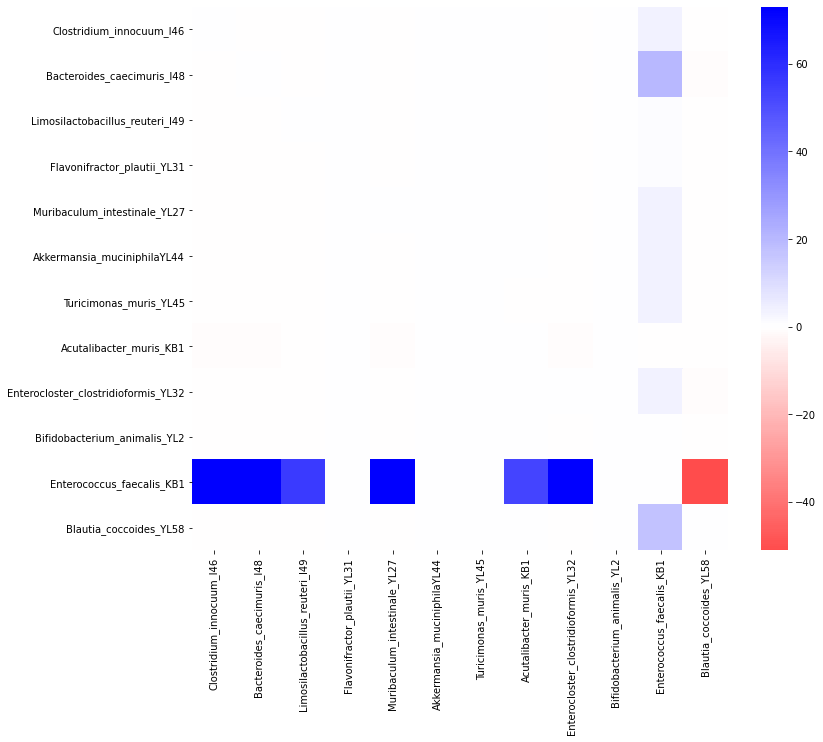

In [351]:
fig,ax = plt.subplots(figsize=(12,10))
sb.heatmap(total_interaction_fc.fillna(0),center = 0,cmap = "bwr_r",ax = ax)

In [329]:
candidate_metabolites_fc

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
Clostridium_innocuum_I46,,,,,PAN,Riboflavin,Riboflavin,,,Riboflavin,Formaldehyde-e0,
Bacteroides_caecimuris_I48,,,PAN,,PAN,Riboflavin,,,,,,
Limosilactobacillus_reuteri_I49,,,,,PAN,Riboflavin,,,,,,
Flavonifractor_plautii_YL31,,,PAN,,,,,,,,,
Muribaculum_intestinale_YL27,,,PAN,,,Riboflavin,,,,,,
Akkermansia_muciniphilaYL44,,,,,,,,,,,,
Turicimonas_muris_YL45,,,,,PAN,,,Pyridoxal,,,,
Acutalibacter_muris_KB1,,,,,,,Riboflavin,,,,,
Enterocloster_clostridioformis_YL32,,,,,PAN,,,,,,,L-Rhamnose-e0+PAN
Bifidobacterium_animalis_YL2,,,PAN,,PAN,Riboflavin,,,,,,


In [330]:
strongest_matching_metabolite_fc

,Clostridium_innocuum_I46,Bacteroides_caecimuris_I48,Limosilactobacillus_reuteri_I49,Flavonifractor_plautii_YL31,Muribaculum_intestinale_YL27,Akkermansia_muciniphilaYL44,Turicimonas_muris_YL45,Acutalibacter_muris_KB1,Enterocloster_clostridioformis_YL32,Bifidobacterium_animalis_YL2,Enterococcus_faecalis_KB1,Blautia_coccoides_YL58
Clostridium_innocuum_I46,,,,,PAN,Riboflavin,Riboflavin,,,Riboflavin,Formaldehyde-e0,
Bacteroides_caecimuris_I48,,,PAN,,PAN,Riboflavin,,,,,,
Limosilactobacillus_reuteri_I49,,,,,PAN,Riboflavin,,,,,,
Flavonifractor_plautii_YL31,,,PAN,,,,,,,,,
Muribaculum_intestinale_YL27,,,PAN,,,Riboflavin,,,,,,
Akkermansia_muciniphilaYL44,,,,,,,,,,,,
Turicimonas_muris_YL45,,,,,PAN,,,Pyridoxal,,,,
Acutalibacter_muris_KB1,,,,,,,Riboflavin,,,,,
Enterocloster_clostridioformis_YL32,,,,,PAN,,,,,,,L-Rhamnose-e0
Bifidobacterium_animalis_YL2,,,PAN,,PAN,Riboflavin,,,,,,
